<a href="https://colab.research.google.com/github/carloslme/handson-ml2-book/blob/main/09_Unsupervised_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Introduction
The vast majority of the available data is unlabeled. Unsupervised learning can labeled data without needing humans to label everything.

There are three principal unsupervised learning tasks and algorithms:
* **Clustering**: The goal is to groups similar instances together into clusters. Clustering is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-unsupervised learning, dimensionality reduction, and more.

* **Anomaly detection**: The objective is to learn what "normal" data looks like, and then use that to detect abnormal instances, such as defective items on a production line or a new trend in a time series.

* **Density estimation**: This is the task of estimating the probability density function (PDF) of the random process that generated the dataset. Density is commonly used for anomaly detection: instances located in very low-density regions are likely to be anomalies. It is also for data analysis and visualization.

# Clustering
Clustering it is the tasks of identifying similar instances and assigning them to clusters, or groups of similar instances.

In [2]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

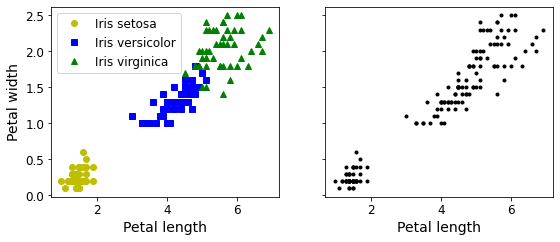

In [5]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

# save_fig("classification_vs_clustering_plot")
plt.show()

Applying a GAussian mixture model, that can actually separate these clusters pretty well (using all 4 features: petal length & width, and sepal & width). 

In [6]:
from sklearn.mixture import GaussianMixture

In [7]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

Let's map each cluster to a class. We will pcik the most common class for each cluster using `scipy.stats.mode()` function.

In [8]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

{0: 1, 1: 2, 2: 0}

In [9]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

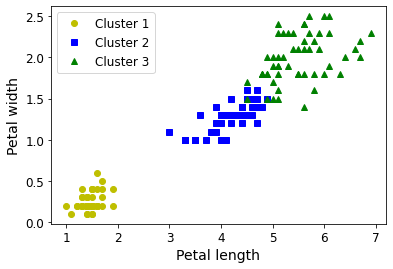

In [10]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [11]:
np.sum(y_pred==y)

145

In [12]:
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

Clustering is used in a wide variety of applications, including these:
* **For customer segmentation**: You can cluster your customer based on their purchases and their activity on your website. For example, a customer segmentation can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.
* **For data analysis**: When you analyze a new dataset, it can be helful to run a clustering algorithm, and then analyze each cluster separately.
* **As a dimensionality reduction technique**: Once a dataset has been clustered, it is usually possible to measure each instance's affinity with each cluster (affinity is any measure of how well an instance fits into a cluster). 
* **For anomaly detection (also called outlier detection)**: Any instance that has a low affinity to all the clusters is likely to be an anomaly. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.
* **For semi-supervisded learning**: If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster.
* **For search engines**: Some search engines let you search for iamges that are similar to a reference image. To build such a a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster.
* **To segment an image**: By clustering pixels according to their color, then replacing each pixel's color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in the image.